In [1]:
import numpy as np
import os
import glob
import re

import matplotlib.pyplot as plt

import cv2
from PIL import Image

%matplotlib inline

In [2]:
path = './sample_animals/'
first = os.listdir(path)

In [3]:
first

['dog5.jpg',
 'dog4.jpg',
 'dog3.jpg',
 'dog2.jpg',
 'dog1.jpg',
 'cat1.jpg',
 'cat2.jpg',
 'cat3.jpg',
 'cat4.jpg',
 'cat5.jpg']

In [4]:
img_list = glob.glob(path + '/*' + ".jpg")

In [5]:
img_list

['./sample_animals/dog5.jpg',
 './sample_animals/dog4.jpg',
 './sample_animals/dog3.jpg',
 './sample_animals/dog2.jpg',
 './sample_animals/dog1.jpg',
 './sample_animals/cat1.jpg',
 './sample_animals/cat2.jpg',
 './sample_animals/cat3.jpg',
 './sample_animals/cat4.jpg',
 './sample_animals/cat5.jpg']

(224, 224, 3)


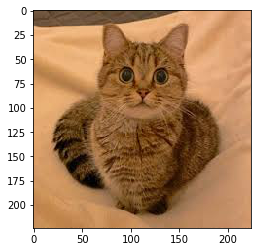

In [6]:
cat_img = Image.open(img_list[5])
        
# サイズを揃える
cat_img = cat_img.resize((224, 224))

cat_img = np.array(cat_img)

print(cat_img.shape)

plt.imshow(cat_img)

<class 'numpy.ndarray'>


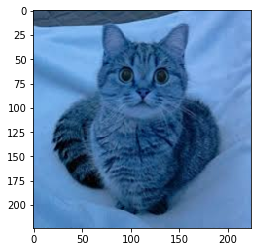

In [7]:
img = cv2.imread(img_list[5])

img = cv2.resize(img, (224, 224))

print(type(img))

plt.imshow(img)

In [9]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        dog_img = Image.open(img)
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        # 正規化
        dog_img = dog_img / 255.0
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        cat_img = Image.open(img)
        cat_img = cat_img.resize((224, 224))
        cat_img = np.array(cat_img)
        cat_img = cat_img / 255.0
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
print(cat_img_array)

[[[[0.45490196 0.35294118 0.2627451 ]
   [0.45490196 0.35294118 0.2627451 ]
   [0.45490196 0.35294118 0.2627451 ]
   ...
   [0.89803922 0.65882353 0.48627451]
   [0.90196078 0.6627451  0.49019608]
   [0.87058824 0.63921569 0.46666667]]

  [[0.45098039 0.34901961 0.25882353]
   [0.45098039 0.34901961 0.25882353]
   [0.45098039 0.34901961 0.25882353]
   ...
   [0.89803922 0.65882353 0.48627451]
   [0.90196078 0.6627451  0.49019608]
   [0.87058824 0.63921569 0.46666667]]

  [[0.44705882 0.34509804 0.25490196]
   [0.44705882 0.34509804 0.25490196]
   [0.44705882 0.34509804 0.25490196]
   ...
   [0.89803922 0.65882353 0.48627451]
   [0.90196078 0.6627451  0.49019608]
   [0.87058824 0.63921569 0.46666667]]

  ...

  [[0.78039216 0.56470588 0.35294118]
   [0.78039216 0.56470588 0.35294118]
   [0.78039216 0.56470588 0.35294118]
   ...
   [0.82745098 0.59607843 0.42352941]
   [0.82745098 0.59607843 0.42352941]
   [0.82745098 0.59607843 0.43137255]]

  [[0.78039216 0.56470588 0.35294118]
   [0.7

In [10]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        dog_img = Image.open(img)
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        # 正規化
        dog_img = dog_img / 255.0
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        cat_img = Image.open(img)
        cat_img = cat_img.resize((224, 224))
        cat_img = np.array(cat_img)
        cat_img = cat_img / 255.0
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [11]:
print('dog_image:{} cat_img:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3) cat_img:(5, 224, 224, 3)


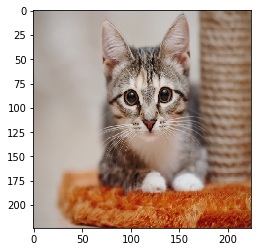

In [12]:
plt.imshow(cat_img_array[1])

In [13]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2, 
                        (img_height - crop_height) // 2, 
                        (img_width + crop_width) // 2, 
                        (img_height + crop_height) // 2))

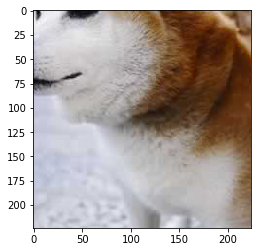

In [14]:
img = Image.open(img_list[1])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

In [15]:
import cv2

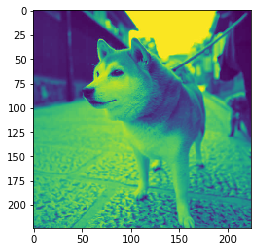

In [16]:
img = cv2.imread(img_list[1], 0)

img = cv2.resize(img, (224, 224))

plt.imshow(img)

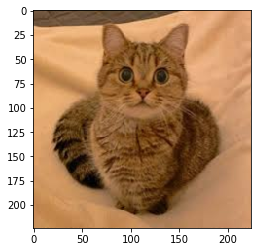

In [17]:
img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

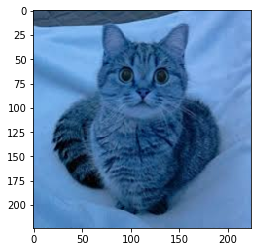

In [18]:
plt.imshow(img)

In [19]:
print(img_list)

['./sample_animals/dog5.jpg', './sample_animals/dog4.jpg', './sample_animals/dog3.jpg', './sample_animals/dog2.jpg', './sample_animals/dog1.jpg', './sample_animals/cat1.jpg', './sample_animals/cat2.jpg', './sample_animals/cat3.jpg', './sample_animals/cat4.jpg', './sample_animals/cat5.jpg']


### 分類

In [20]:
# np.resizeはだめ、ぜったい

d_img_array = np.empty((0,224,224,3))

for img in img_list:
    d_img = Image.open(img)
    # サイズを揃える
    d_img = d_img.resize((224, 224))
    # PIL.Image.Imageからnumpy配列へ
    d_img = np.array(d_img)
    # 正規化
    d_img = d_img / 255.0
    # axisの追加
    d_img = d_img.reshape((1,224,224,3))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(10, 224, 224, 3)


In [21]:
path2 = './test/'
img_list2 = glob.glob(path2 + '/*' + '.jpg')

In [23]:
# np.resizeはだめ、ぜったい
t_img_array = np.empty((0,224,224,3))

for img in img_list2:
    t_img = Image.open(img)
    # サイズを揃える
    t_img = t_img.resize((224, 224))
    # PIL.Image.Imageからnumpy配列へ
    t_img = np.array(t_img)
    if t_img.shape == (224, 224, 4):
        t_img = t_img[:, :, :3]
    # 正規化
    t_img = t_img / 255.0
    # axisの追加
    t_img = t_img.reshape((1,224,224,3))
    t_img_array = np.concatenate([t_img_array, t_img], axis = 0)

print(t_img_array.shape)
X_test = t_img_array

(7, 224, 224, 3)


In [24]:
Y = []
for i in img_list:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [25]:
Y_test = []
for i in img_list2:
    if re.search('dog', i):
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_test

[0, 0, 0, 0, 1, 1, 1]

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

In [29]:
model = Sequential()

model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X, Y, nb_epoch=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/20
10/10 [==============================] - 1s 68ms/step - loss: 0.6513 - accuracy: 0.8000
Epoch 2/20
10/10 [==============================] - 1s 51ms/step - loss: 4.0227 - accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 1s 52ms/step - loss: 34.4098 - accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 1s 52ms/step - loss: 20.8876 - accuracy: 0.6000
Epoch 5/20
10/10 [==============================] - 1s 52ms/step - loss: 1.7589 - accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 1s 51ms/step - loss: 12.3882 - accuracy: 0.4000
Epoch 7/20
10/10 [==============================] - 1s 51ms/step - loss: 5.9543 - accuracy: 0.6000
Epoch 8/20
10/10 [==============================] - 1s 53ms/step - loss: 2.6599 - accuracy: 0.7000
Epoch 9/20
10/10 [==============================] - 1s 52ms/step - loss: 6.0205 - accuracy: 0.8000
Epoch 10/20
10/10 [==============================] - 1s 52ms/step - loss: 7.6228 - accuracy: 0.7000
Epoch

In [30]:
Y_pred = np.round(model.predict(X_test))

In [31]:
Y_test

[0, 0, 0, 0, 1, 1, 1]

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[3, 1],
       [2, 1]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5714285714285714

### 【問題2】分類データセットに対するデータ拡張

In [35]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [37]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# 入力ディレクトリを作成
input_dir = "sample_cat"
files = glob.glob(input_dir + '/*.jpg')
 
# 出力ディレクトリを作成
output_dir = "photo_out_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [38]:
# 入力ディレクトリを作成
input_dir = "sample_dog"
files = glob.glob(input_dir + '/*.jpg')
 
# 出力ディレクトリを作成
output_dir = "photo_out_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [41]:
path3 = './photo_out_mix'

In [42]:
img_list_mix = glob.glob(path3 + '/*' + ".jpg")
img_list_mix

['./photo_out_mix/dog_0_8588.jpg',
 './photo_out_mix/dog_0_5084.jpg',
 './photo_out_mix/cat_0_2321.jpg',
 './photo_out_mix/dog_0_2099.jpg',
 './photo_out_mix/cat_0_6806.jpg',
 './photo_out_mix/cat_0_1827.jpg',
 './photo_out_mix/dog_0_5053.jpg',
 './photo_out_mix/dog_0_797.jpg',
 './photo_out_mix/dog_0_6770.jpg',
 './photo_out_mix/dog_0_4615.jpg',
 './photo_out_mix/dog_0_2264.jpg',
 './photo_out_mix/dog_0_7334.jpg',
 './photo_out_mix/dog_0_3973.jpg',
 './photo_out_mix/cat_0_5704.jpg',
 './photo_out_mix/cat_0_6557.jpg',
 './photo_out_mix/dog_0_4946.jpg',
 './photo_out_mix/dog_0_2304.jpg',
 './photo_out_mix/dog_0_4007.jpg',
 './photo_out_mix/cat_0_5260.jpg',
 './photo_out_mix/dog_0_4588.jpg',
 './photo_out_mix/dog_0_2847.jpg',
 './photo_out_mix/dog_0_4577.jpg',
 './photo_out_mix/dog_0_9735.jpg',
 './photo_out_mix/cat_0_3188.jpg',
 './photo_out_mix/dog_0_8364.jpg',
 './photo_out_mix/cat_0_544.jpg',
 './photo_out_mix/cat_0_550.jpg',
 './photo_out_mix/dog_0_635.jpg',
 './photo_out_mix/cat_0_

In [43]:
d_img_array = np.empty((0,224,224,3))


for img in img_list_mix:

    d_img = Image.open(img)

    # サイズを揃える
    d_img = d_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    d_img = np.array(d_img)

    # 正規化
    d_img = d_img / 255.0

    # axisの追加
    d_img = d_img.reshape((1,224,224,3))

    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(501, 224, 224, 3)


In [44]:
Y = []
for i in  img_list_mix:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [45]:

model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(3,3))

model.add(Flatten())

model.add(Dense(200,  activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(200, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))


# オプティマイザにAdamを使用
opt = optimizers.Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# 学習を実行。10%はテストに使用。
# model.fit(image_list, Y, nb_epoch=100, batch_size=10, validation_split=0.1)
model.fit(X, Y, nb_epoch=15,  batch_size=50, validation_split=0.1)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 450 samples, validate on 51 samples
Epoch 1/15
450/450 [==============================] - 6s 13ms/step - loss: 0.6760 - accuracy: 0.5778 - val_loss: 0.5243 - val_accuracy: 0.6275
Epoch 2/15
450/450 [==============================] - 5s 12ms/step - loss: 0.4177 - accuracy: 0.8289 - val_loss: 0.1086 - val_accuracy: 1.0000
Epoch 3/15
450/450 [==============================] - 5s 12ms/step - loss: 0.1339 - accuracy: 0.9622 - val_loss: 0.0874 - val_accuracy: 0.9608
Epoch 4/15
450/450 [==============================] - 5s 12ms/step - loss: 0.1161 - accuracy: 0.9489 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 5/15
450/450 [==============================] - 5s 12ms/step - loss: 0.0329 - accuracy: 0.9956 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/15
450/450 [==============================] - 5s 12ms/step - loss: 0.0215 - accuracy: 0.9911 - val_loss: 4.7987e-04 - val_accuracy: 1.0000
Epoch 7/15
450/450 [==============================] - 5s 12ms/step - loss: 0.0040 - accuracy:

In [46]:
Y_pred = np.round(model.predict(X_test))

In [47]:
confusion_matrix(Y_test, Y_pred)

array([[1, 3],
       [2, 1]])

In [48]:
accuracy_score(Y_test, Y_pred)

0.2857142857142857

In [49]:
path4 = './test/'

In [50]:
img_list_test = glob.glob(path4 + '/*' + ".jpg")
img_list_test

['./test/cat_1.jpg',
 './test/cat_2.jpg',
 './test/cat_3.jpg',
 './test/cat_6.jpg',
 './test/dog_6.jpg',
 './test/dog_1.jpg',
 './test/dog_3.jpg']

In [51]:
t_img_array = np.empty((0,224,224,3))


for img in img_list_test:

    t_img = Image.open(img)
#     img = cv2.imread(img_list[1], 0)
    # サイズを揃える
    t_img = t_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    t_img = np.array(t_img)
    if  t_img.shape == (224, 224, 4):
        t_img = t_img[:,:,:3]
    
    print(t_img.shape)
    # 正規化
    t_img = t_img / 255.0

    # axisの追加
    t_img = t_img.reshape((1,224,224,3))

    t_img_array = np.concatenate([t_img_array, t_img], axis = 0)

print(t_img_array.shape)
X_test = t_img_array

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(7, 224, 224, 3)


In [52]:
for i in  img_list_test:
    print(i)

./test/cat_1.jpg
./test/cat_2.jpg
./test/cat_3.jpg
./test/cat_6.jpg
./test/dog_6.jpg
./test/dog_1.jpg
./test/dog_3.jpg


In [53]:
Y_test = []
for i in  img_list_test:
    if re.search('dog', i):
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_test

[0, 0, 0, 0, 1, 1, 1]

In [54]:
Y_pred = np.round(model.predict(X_test))
Y_pred

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [55]:
confusion_matrix(Y_test, Y_pred)

array([[1, 3],
       [2, 1]])

In [56]:
accuracy_score(Y_test, Y_pred)

0.2857142857142857

### 【問題3】物体検出データセットの用意

In [57]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [58]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [59]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(10,40))
    plt.imshow(img)
    return img

In [60]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [63]:
image = download_image('./sample_cat/cat1.jpg')
image = np.array(image)

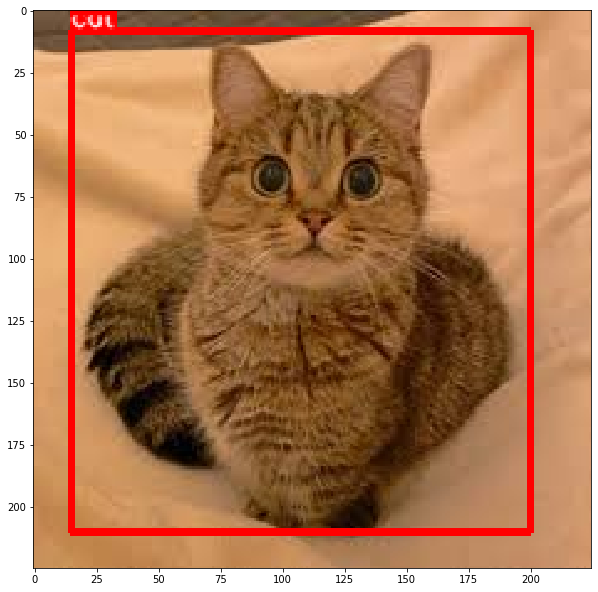

In [77]:
image = download_image('./sample_cat/cat1.jpg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[15,8,200,210]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/cat1_img.jpg")

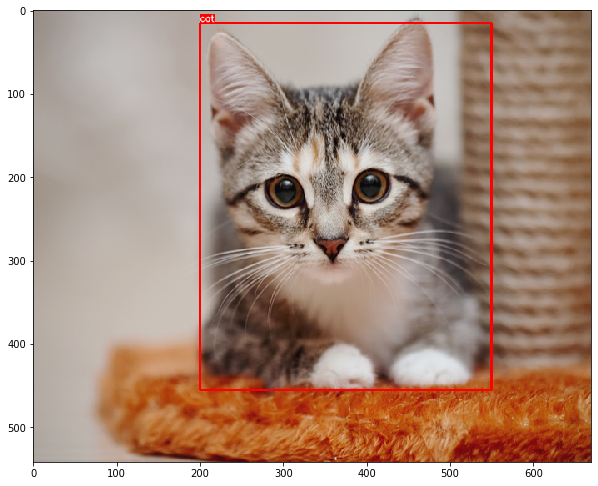

In [83]:
image = download_image('./sample_cat/cat2.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[200,15,550,455]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/cat2_img.jpg")

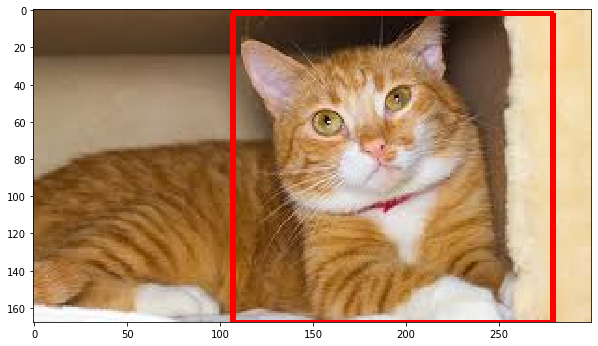

In [85]:
image = download_image('./sample_cat/cat3.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[107, 2, 279, 168]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/cat3_img.jpg")

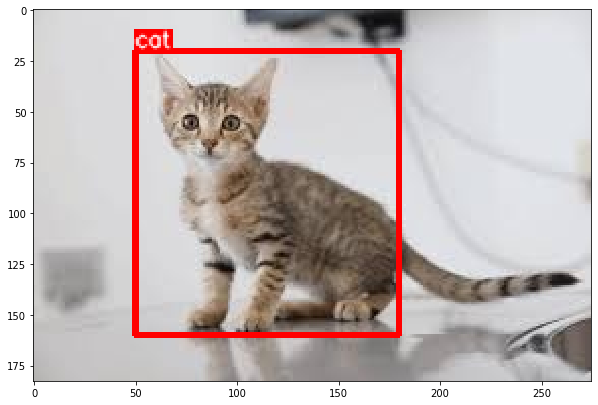

In [88]:
image = download_image('./sample_cat/cat4.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[50,20,180,160]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/cat4_img.jpg")

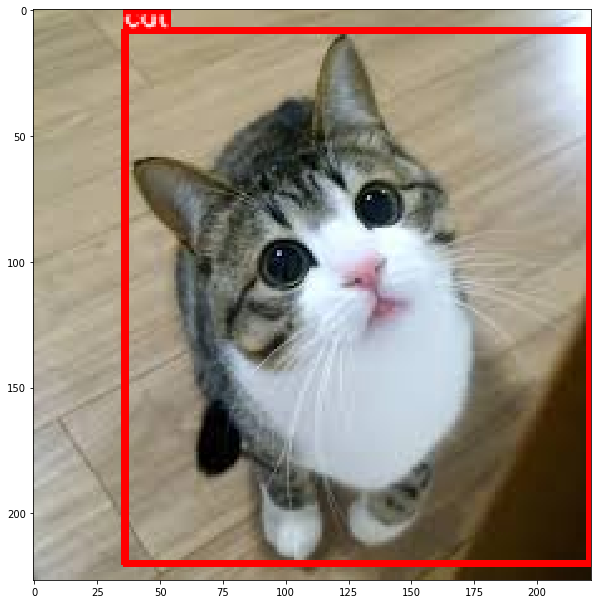

In [90]:
image = download_image('./sample_cat/cat5.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[36, 8, 221, 220]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/cat5_img.jpg")

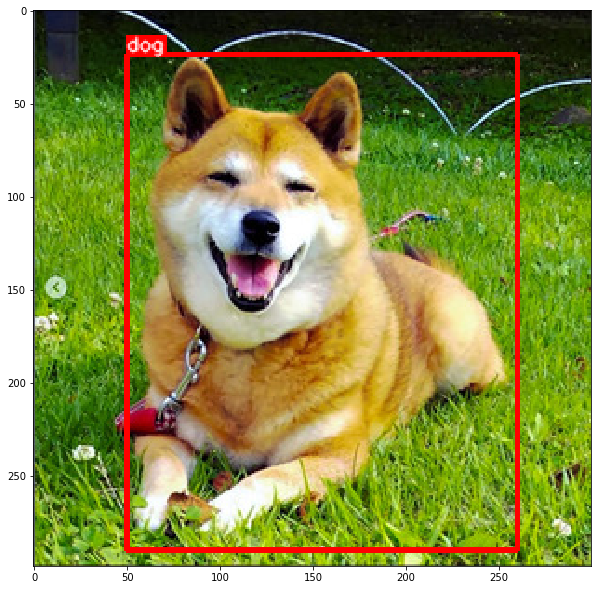

In [93]:
image = download_image('./sample_dog/dog1.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[50, 24, 260, 290]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/dog1_img.jpg")

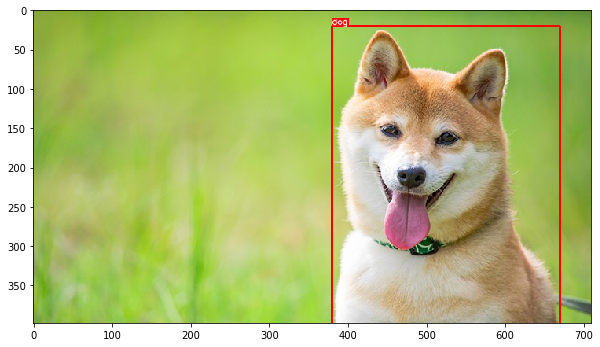

In [96]:
image = download_image('./sample_dog/dog2.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[380, 20, 670, 400]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/dog2_img.jpg")

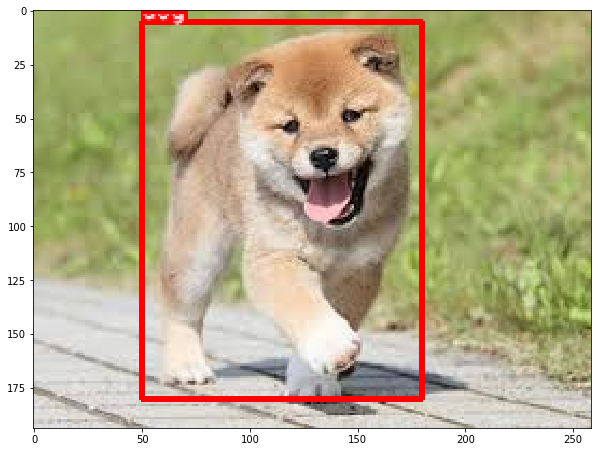

In [98]:
image = download_image('./sample_dog/dog3.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[50, 5, 180, 180]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/dog3_img.jpg")

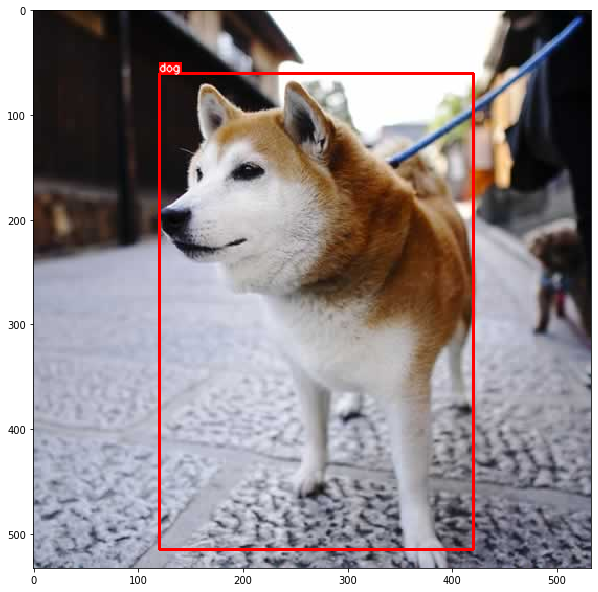

In [100]:
image = download_image('./sample_dog/dog4.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[120, 60, 420, 515]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/dog4_img.jpg")

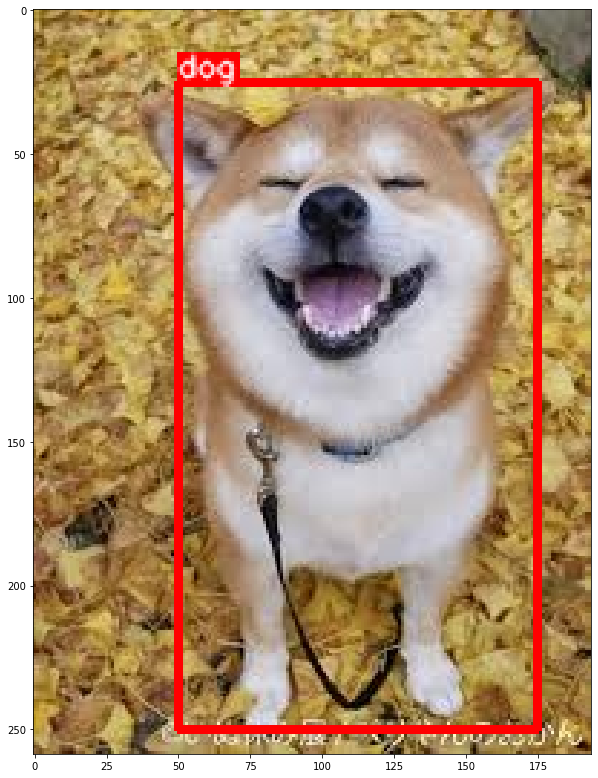

In [102]:
image = download_image('./sample_dog/dog5.jpg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[50, 25, 175, 250]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("./image_list/dog5_img.jpg")

### 【問題4】物体検出データセットに対するデータ拡張

In [105]:
# 入力ディレクトリを作成
input_dir = "./photos2"
files = glob.glob(input_dir + '/*.jpg')
 
# 出力ディレクトリを作成
output_dir = "./image_ag"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()